## Importing the Necessary Libraries ##

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

In [2]:
!pip install imblearn
import imblearn
print(imblearn.__version__)

0.7.0


## Read Dataset ##

In [3]:
df = pd.read_csv('./Bank.csv', index_col = 0)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,deposit
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,yes
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,yes


In [4]:
# Replacing the deposit column name by label 'y'
df.rename(columns = lambda x: x.replace('deposit', 'y'), inplace = True)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,yes
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,no
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,no


In [5]:
# changing 'yes' and 'no' strings to "0" and "1" values
df['y'] = [1 if x == 'yes' else 0 for x in df['y']]
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


# Analyzing the Data #

In [6]:
# Looking for any missing data
print(df.isnull().count())

age               41188
job               41188
marital           41188
education         41188
default           41188
housing           41188
loan              41188
contact           41188
month             41188
day_of_week       41188
duration          41188
campaign          41188
pdays             41188
previous          41188
poutcome          41188
emp_var_rate      41188
cons_price_idx    41188
cons_conf_idx     41188
euribor3m         41188
nr_employed       41188
y                 41188
dtype: int64


### From describe function and boxplot, we can see that most of the ages asking for a deposit are distributed between 32 and 47 years old. ###

In [7]:
df.age.describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

<AxesSubplot:xlabel='y', ylabel='age'>

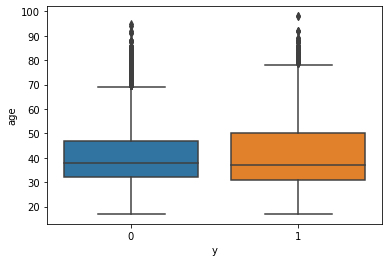

In [8]:
sns.boxplot(x = 'y', y = 'age', data = df)

### We are looking for outliers in the numerical features. We can use the .describe() method to examine the descriptive statistics of the column age. Using a rule of thumb of outliers being defined as: mean±1.5x standard deviation. The outliers represent 11% of the data. Due to this, we will keep the outliers as they still represent valuable data. ###

In [9]:
def outlier_counter(column_name):
    column=df['age']
    m=column.mean()
    s=column.std()
    outlier_upper=df[column>(m+1.5*s)]
    outlier_lower=df[column<(m-1.5*s)]
    return len(outlier_upper+outlier_lower)
outlier_counter('age')

4650

## Now we want to examine the values in each of the target classes ##

In [10]:
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

## We have a problem with imbalanced classification data ##

In [11]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

### We will only use numeric columns to split the data since we do not see much value on the object type columns. ###

In [12]:
# Using only numeric columns to split the data
df = df.select_dtypes(include = ['int64', 'float64'])
X = df.drop(['y'], axis = 'columns')
y = df['y']

# Balancing Dataset with SMOTE #

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


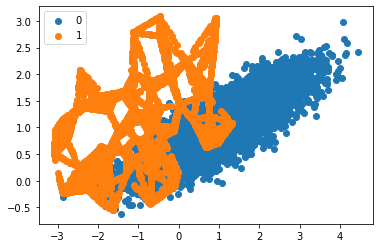

In [13]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

# Logistic Regression - Classification #

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Train / Test Set Splitting and Scaling ##

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [16]:
scaler = StandardScaler()

In [17]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Logistic Regression Model ##

In [18]:
from sklearn.linear_model import LogisticRegressionCV
lgr = LogisticRegressionCV()
lgr.fit(scaled_X_train, y_train)

LogisticRegressionCV()

## Baseline ##

In [19]:
pd.value_counts(y_test, normalize = True)

1    0.500808
0    0.499192
dtype: float64

## Model Performance ##

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [21]:
y_pred = lgr.predict(scaled_X_test)

In [22]:
accuracy_score(y_test, y_pred)

0.9147474747474748

In [23]:
confusion_matrix(y_test, y_pred)

array([[2285,  186],
       [ 236, 2243]])

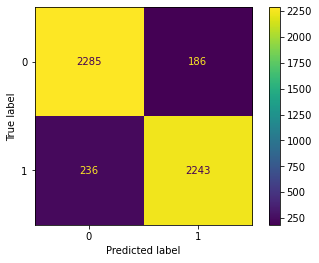

In [24]:
plot_confusion_matrix(lgr, scaled_X_test, y_test)

### As per below results we can see that our score values are high. If we compare them to the baseline, we can conclude that our model has done a very good job with our predictions ##

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      2471
           1       0.92      0.90      0.91      2479

    accuracy                           0.91      4950
   macro avg       0.91      0.91      0.91      4950
weighted avg       0.91      0.91      0.91      4950



## Evaluating Curves and AUC ##

In [26]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve

In [27]:
y_score = lgr.decision_function(X_test)

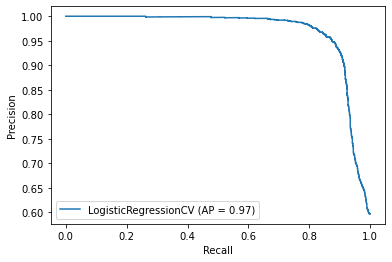

In [28]:
plot_precision_recall_curve(lgr, scaled_X_test, y_test)

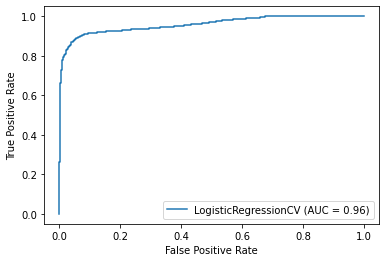

In [29]:
plot_roc_curve(lgr, scaled_X_test, y_test)

# K Nearest Neighbors (KNN) - Classification #

## Importing Necessary Libraries ##

In [30]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [31]:
!pip install imblearn
import imblearn
print(imblearn.__version__)

0.7.0


## Read Dataset ##

In [32]:
df = pd.read_csv('./Bank.csv', index_col = 0)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,deposit
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,yes
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,yes


In [33]:
# Replacing the deposit column name by label 'y'
df.rename(columns = lambda x: x.replace('deposit', 'y'), inplace = True)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,yes
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,no
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,no


In [34]:
# changing 'yes' and 'no' strings to "0" and "1" values
df['y'] = [1 if x == 'yes' else 0 for x in df['y']]
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


# Analyzing the Data #

In [35]:
# Looking for any missing data
print(df.isnull().count())

age               41188
job               41188
marital           41188
education         41188
default           41188
housing           41188
loan              41188
contact           41188
month             41188
day_of_week       41188
duration          41188
campaign          41188
pdays             41188
previous          41188
poutcome          41188
emp_var_rate      41188
cons_price_idx    41188
cons_conf_idx     41188
euribor3m         41188
nr_employed       41188
y                 41188
dtype: int64


In [36]:
df.age.describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

### From describe function and boxplot, we can see that most of the ages asking for a deposit are distributed between 32 and 47 years old. ###

In [37]:
df.age.describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

<AxesSubplot:xlabel='y', ylabel='age'>

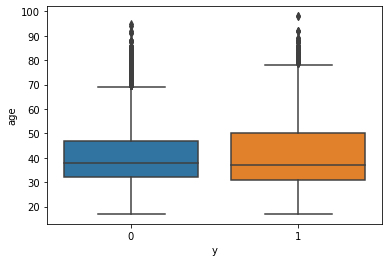

In [38]:
sns.boxplot(x = 'y', y = 'age', data = df)

### We are looking for outliers in the numerical features. We can use the .describe() method to examine the descriptive statistics of the column age. Using a rule of thumb of outliers being defined as: mean±1.5x standard deviation. The outliers represent 11% of the data. Due to this, we will keep the outliers as they still represent valuable data. ###

In [39]:
def outlier_counter(column_name):
    column=df['age']
    m=column.mean()
    s=column.std()
    outlier_upper=df[column>(m+1.5*s)]
    outlier_lower=df[column<(m-1.5*s)]
    return len(outlier_upper+outlier_lower)
outlier_counter('age')

4650

## Now we want to examine the values in each of the target classes ##

In [40]:
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

## We have a problem with imbalanced classification data ##

In [41]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

### We will only use numeric columns to split the data since we do not see much value on the object type columns. ###

In [42]:
# Using only numeric columns to split the data
df = df.select_dtypes(include = ['int64', 'float64'])
X = df.drop(['y'], axis = 'columns')
y = df['y']

# Balancing Dataset with SMOTE #

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


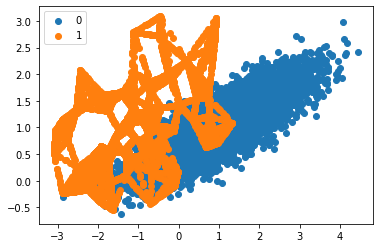

In [43]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

## Train / Test Set Splitting and Scaling ##

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [45]:
scaler = StandardScaler()

In [46]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## KNN Model ##

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
knn_model = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)

In [49]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

## Baseline ##

In [50]:
pd.value_counts(y_test, normalize = True)

1    0.500808
0    0.499192
dtype: float64

# Understanding KNN and choosing K Value ##

## Model Evaluation ##

In [51]:
y_pred = knn_model.predict(scaled_X_test)

In [52]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix

In [53]:
accuracy_score(y_test, y_pred)

0.9424242424242424

In [54]:
confusion_matrix(y_test, y_pred)

array([[2306,  165],
       [ 120, 2359]])

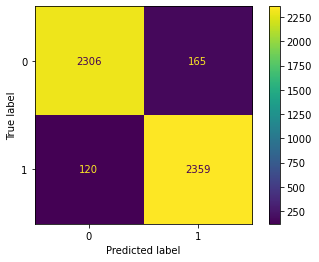

In [55]:
plot_confusion_matrix(knn_model, scaled_X_test, y_test)

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2471
           1       0.93      0.95      0.94      2479

    accuracy                           0.94      4950
   macro avg       0.94      0.94      0.94      4950
weighted avg       0.94      0.94      0.94      4950



## Full Cross Validation Grid Search for K Value ##

In [57]:
scaler = StandardScaler()

In [58]:
knn = KNeighborsClassifier()

In [59]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [60]:
operations = [('scaler', scaler), ('knn', knn)]

In [61]:
from sklearn.pipeline import Pipeline

In [62]:
pipe = Pipeline(operations)

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
k_values = list(range(1, 20))

In [65]:
param_grid = {'knn__n_neighbors': k_values}

In [66]:
full_cv_classifier = GridSearchCV(pipe, param_grid, cv = 5, scoring = 'accuracy')

In [67]:
full_cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [68]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

## Final Model Performance with n_neighbors=4 as per above best parameter estimator ##

In [69]:
scaler = StandardScaler()
knn4 = KNeighborsClassifier(n_neighbors = 4)
operations = [('scaler', scaler), ('knn4', knn4)]

In [70]:
pipe = Pipeline(operations)

In [71]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn4', KNeighborsClassifier(n_neighbors=4))])

In [72]:
pipe_pred = pipe.predict(X_test)

### As per below results, we see that our score values are high. If we compare them to the baseline, we can conclude that our model has done a very good job with our predictions. ##

In [73]:
print(classification_report(y_test, pipe_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2471
           1       0.95      0.93      0.94      2479

    accuracy                           0.94      4950
   macro avg       0.94      0.94      0.94      4950
weighted avg       0.94      0.94      0.94      4950



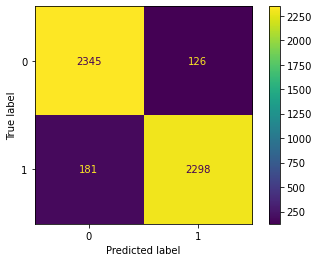

In [74]:
plot_confusion_matrix(pipe, X_test, y_test)

# Random Forest - Classification #


In [75]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [76]:
!pip install imblearn
import imblearn
print(imblearn.__version__)

0.7.0


## Read the dataset ##

In [77]:
df = pd.read_csv('./Bank.csv',index_col=0)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,deposit
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,yes
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,yes


In [78]:
# Replacing deposit column name by label "y"
df.rename(columns=lambda x: x.replace('deposit', 'y'), inplace=True)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,yes
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,no
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,no


In [79]:
#Changing yes and no string for "0" and "1" values
df['y'] = [1 if x=='yes' else 0 for x in df['y']]
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


## Analyzing the data ##

In [80]:
#Looking for any missing data
df.isnull().count()

age               41188
job               41188
marital           41188
education         41188
default           41188
housing           41188
loan              41188
contact           41188
month             41188
day_of_week       41188
duration          41188
campaign          41188
pdays             41188
previous          41188
poutcome          41188
emp_var_rate      41188
cons_price_idx    41188
cons_conf_idx     41188
euribor3m         41188
nr_employed       41188
y                 41188
dtype: int64

### From the describe function and boxplot, we can see that most of the ages asking for a deposit are distributed between ages of 32 and 47 years old ###

In [81]:
df.age.describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

<AxesSubplot:xlabel='y', ylabel='age'>

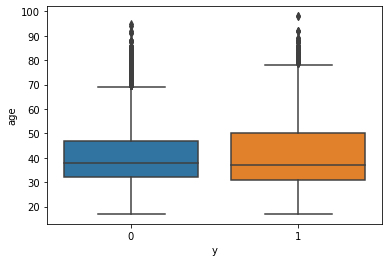

In [82]:
sns.boxplot(x='y',y='age',data=df)

### We are looking for outliers in the numerical features. We can use the .describe() method to examine the descriptive statistics of the column age. Using a rule of thumb of outliers being defined as: mean±1.5x standard deviation. The outliers represent 11% of the data. Due to this, we will keep the outliers as they still represent valuable data. ###

In [83]:
def outlier_counter(column_name):
    column=df['age'] 
    m=column.mean()
    s=column.std()
    outlier_upper=df[column>(m+1.5*s)]
    outlier_lower=df[column<(m-1.5*s)]
    return len(outlier_upper+outlier_lower)
outlier_counter('age')

4650

In [84]:
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

## We have a problem of imbalanced classification data ##

In [85]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

### We will use only numeric columns to split the data as we do not see much value on the object type columns ###

In [86]:
df=df.select_dtypes(include=['int64','float64'])
X=df.drop(['y'],axis='columns')
y=df['y']

## SMOTE for Balancing Data ##

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


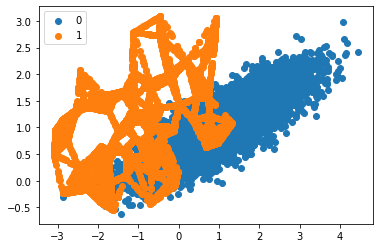

In [87]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

## Train / Test Set Splitting and Scaling ##

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

## Random Forest Model ##

In [89]:
# Let's use 10 random trees
model = RandomForestClassifier(n_estimators=10, max_features='auto', criterion = 'entropy', random_state = 0)

In [90]:
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [91]:
preds = model.predict(X_test)

## Baseline ##

In [92]:
pd.value_counts(y_test,normalize=True)

1    0.500808
0    0.499192
dtype: float64

## Model Performance ##

In [93]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,accuracy_score

In [94]:
confusion_matrix(y_test,preds)

array([[2370,  101],
       [ 139, 2340]])

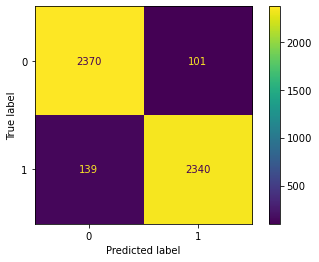

In [95]:
plot_confusion_matrix(model,X_test,y_test)

### Feature Importance

In [96]:
model.feature_importances_

array([0.74327032, 0.25672968])

### Choosing correct number of trees

In [97]:
test_error = []

for n in range(1,50):
    # Use n random trees
    model = RandomForestClassifier(n_estimators=n,max_features='auto')
    model.fit(X_train,y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))

### From the graph we can see that after about 40 trees the error start decreasing

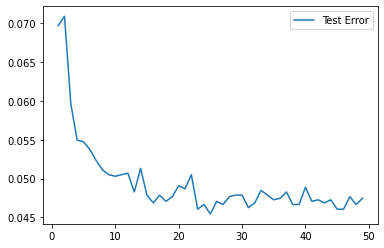

In [98]:
plt.plot(range(1,50),test_error,label='Test Error')
plt.legend()

## Random Forest - HyperParameter Exploration ##

## Train / Test Split ##

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

In [100]:
from sklearn.model_selection import GridSearchCV

In [101]:
n_estimators=[64,100,128,200]

In [102]:
max_features= [2,3,4,5,6]

In [103]:
bootstrap = [True, False]

In [104]:
oob_score = [True,False]

In [105]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}

In [106]:
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid)

In [107]:
grid.fit(X_train,y_train);

### Best parameters estimators

In [108]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 100, 'oob_score': True}

In [109]:
predictions = grid.predict(X_test)

In [110]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2471
           1       0.95      0.95      0.95      2479

    accuracy                           0.95      4950
   macro avg       0.95      0.95      0.95      4950
weighted avg       0.95      0.95      0.95      4950



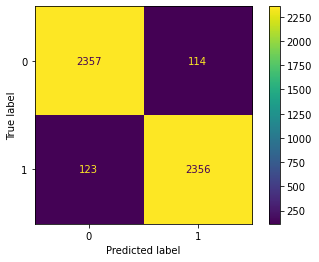

In [111]:
plot_confusion_matrix(grid,X_test,y_test)

## Understanding Number of Estimators (Trees)

In [112]:
from sklearn.metrics import accuracy_score

In [113]:
errors = []
misclassifications = []

for n in range(1,128):
    rfc = RandomForestClassifier( n_estimators=n,bootstrap=True,max_features= 2)
    rfc.fit(X_train,y_train)
    preds = rfc.predict(X_test)
    err = 1 - accuracy_score(preds,y_test)
    n_missed = np.sum(preds != y_test) 
    errors.append(err)
    misclassifications.append(n_missed)

### From the graph below we can see that after 64 trees we do not improve performance.

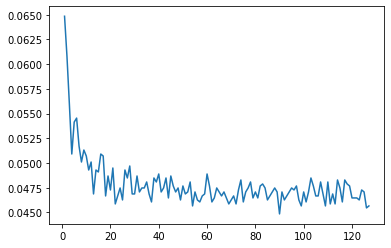

In [114]:
plt.plot(range(1,128),errors)

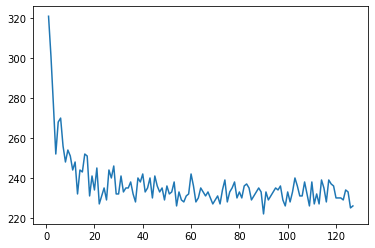

In [115]:
plt.plot(range(1,128),misclassifications)